# Сборный проект

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Hужно выявить определяющие успешность игры закономерности, а именно:

1. ***Открыть файл с данными и изучить общую информацию***

2. ***Подготовить данные***

3. ***Провести исследовательский анализ данных***
Ответить на вопросы:
Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Взять данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
Соотнести выводы с продажами игр на других платформах.
Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. ***Составить портрет пользователя каждого региона***
Ответить на вопросы:
Определить для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Описать различия в долях продаж.
Самые популярные жанры (топ-5). 
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

5. ***Проверить гипотезы***
Гипотезы для проверки:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

6. ***Написать общий вывод***


## 1 Скачивание данных

Необходимо загрузить файл и предварительно оценить качество данных.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [ ]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.head(4)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод:

Скачал данные. Из описания известно что:

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB 

Предварительно видно что столбцы имеют некорректные названия и есть ряд пропущенных значений.

## 2 Подготовка данных

Необходимо: 

- заменить названия столбцов;
- преобразовать данные в нужные типы;
- обработать пропуски;
-  посчитать суммарные продажи во всех регионах.

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Автоматическая проверка дубликаты не обнаружила. После ручной проверки дубликатов тоже не обнаружено, значения корректны.

In [ ]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
data[data['year_of_release'].isna()].head(6)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T


Пропуски в дате выхода игры не имеют какой-то системы и не поддаются простому восстановлению. В ручную искать и восстанавливать даты для нескольких сотен пропущенных значений считаю нерациональным. С учётом того что эти данные участвуют в анализе замена так же нецелесообразна. Тк пропущенных данных сравнительно немного можно удалить данные строки.

Этим мы отбросили 269 строк или 1.6% от всей информации.

In [ ]:
data = data.dropna(subset = ['year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null float64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Аналогично поступим с пропусками в названии игры.

In [ ]:
data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Остались пропуски в значениях рейтинга. Эти данные не имеют какой-то системы и их невозможно восстановить. В то же время их слишком много, и отбрасывать их тоже нельзя. Принимаю решение оставить пропуски как есть.

Text(0.5, 1.0, 'distribution  critics score')

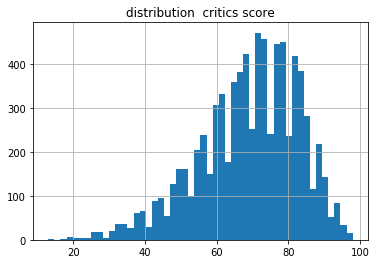

In [ ]:
data['critic_score'].hist(bins=50)
plt.title('distribution  critics score')

In [ ]:
data.groupby('rating')['name'].count()

rating
AO         1
E       3921
E10+    1393
EC         8
K-A        3
M       1536
RP         1
T       2905
Name: name, dtype: int64

In [ ]:
data[data['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Проверил распределение для разных типов рейтинга. Рейтинг критиков похож на нормальное распределение и выглядит правдоподобно. Для возрастного рейтинга видно что значения AO (Только для взрослых), EC (Для детей младшего возраста),  K-A ("для детей и взрослых"), RP (Рейтинг ожидается) составляют абсолютное меньшинство.
В результате гугленья этой информации узнал что рейтинг K-A позднее был переименован в "Е". В принципе можно было бы поменять эти значения, но у нас есть всего 3 игры подобного типа и все они выпущены в 96-97 годах, ктотрые мы всё равно отбросим для дальнейшего анализа. Так что оставлю всё как есть.

<div class="alert alert-info"> Получше познакомился с работой аналитика. После размышлений решил оставить всё как есть но было поучительно. </div>

In [ ]:
data[['year_of_release']] = data[['year_of_release']].astype('int')
data.info()
# Привёл год выхода игры к целому числу. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Столбец user_score имеет строковый тип, что странно. Необходимо проверить и привести к числу.

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data = data.replace('tbd', np.nan)
data[['user_score']] = data[['user_score']].astype('float')
# Заменил непонятное значение 'tbd' на np.nan. Привёл к  числу с плавающей точкой (потому что есть наны). 

In [ ]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# создал столбец all_sales где суммировал продажи во всех регионах

In [ ]:
data.head(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77


### Вывод

Исправил названия столбцов, проверил на дубликаты, обработал пропуски, преобразовал дату выхода в целое число, а пользовательский рейтинг в число с плавающей точкой, посчитал суммарные продажи и выделил в отдельный столбец.

## 3 Исследовательский анализ данных

Необходимо:
- Посмотреть сколько игр выпускалось в разные годы. 
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и определить актуальный период.
- Использовать данные только за актуальный период, остальное отбросить.
- Определить, какие платформы лидируют по продажам и выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Определить прибыльные жанры.

In [ ]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Text(0.5, 1.0, 'distribution of games by year')

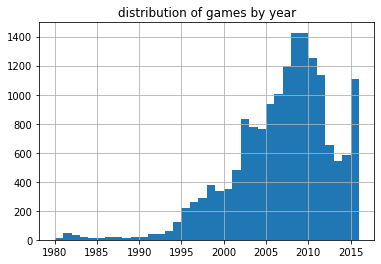

In [ ]:
data['year_of_release'].hist(bins=36)
plt.title('distribution of games by year')

Анализируя данные можно заметить что после 1994 года количество игр превысило сотню, что более чем в два раза больше чем количество выпускавшихся в год игр до этого. Поэтому можно сосредоточится на периоде с 1994 по 2016 годы. Игры более раннего года выпуска отбрасываем.

In [ ]:
data = data[data['year_of_release']>=1994]
# Отбросил игры до 1994 года.

In [ ]:
data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(15)
# Вывел платформы с наибольшими продажами.

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
Name: all_sales, dtype: float64

In [ ]:
name_platform = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(8).index
name_platform
# Вывел первые 8 индексов в отдельный список

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA'], dtype='object', name='platform')

Text(0.5, 1.0, 'distribution of platform by year')

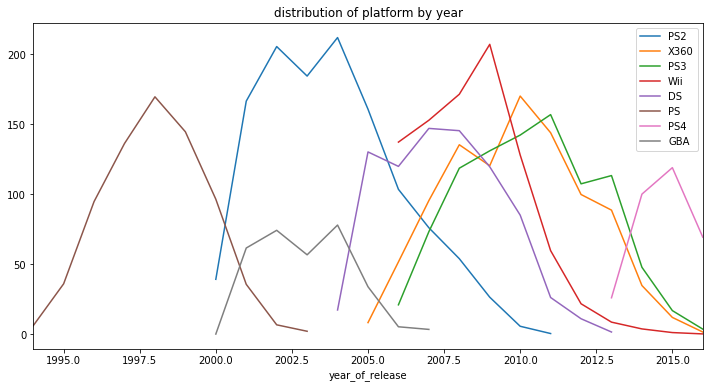

In [ ]:
for x in name_platform:
    data[data['platform'] == x].groupby('year_of_release')['all_sales'].sum().plot(x="year_of_release", figsize = (12, 6))
plt.legend(name_platform)
plt.title('distribution of platform by year')

<div class="alert alert-info"> Исправил. </div>

По графикам можно определить что средний срок жизни одной платформы составляет около 10 лет. 

Для определения платформ которые находятся на подъёме нужно взять меньше чем половину от этого срока. Возьму для рассмотрения 4 года, от 2013 до 2017.

<div class="alert alert-info"> Исправил. </div>

In [ ]:
name_platform_new = data[data['year_of_release']>=2013].groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10).index
# Вывел первые 10 индексов в обновлённый список

PS4


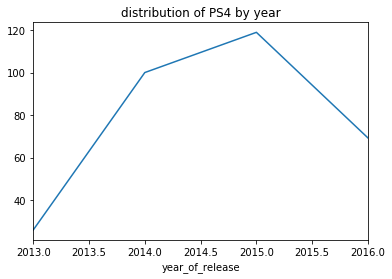

PS3


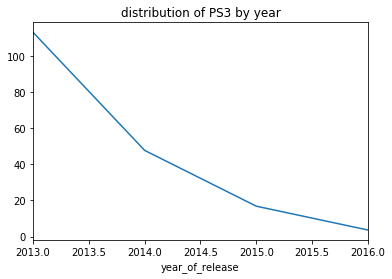

XOne


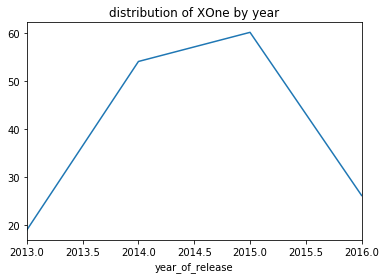

3DS


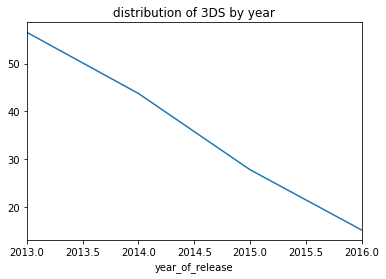

X360


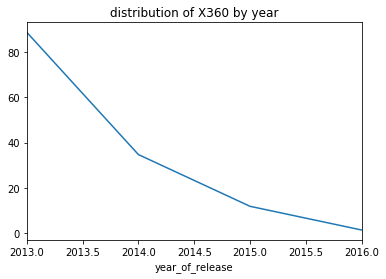

WiiU


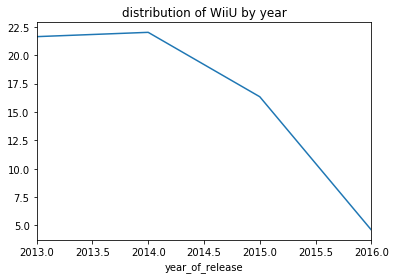

PC


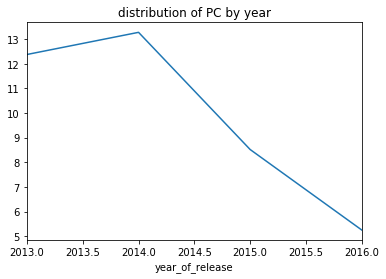

PSV


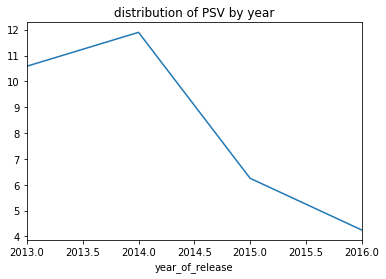

Wii


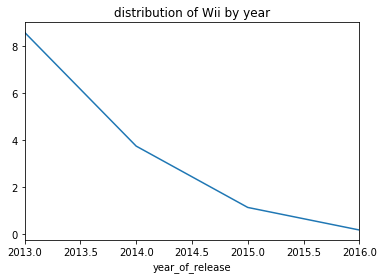

PSP


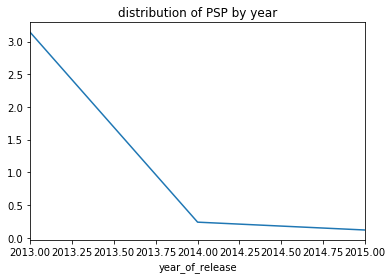

In [ ]:
for x in name_platform_new:
    data[(data['platform'] == x)&(data['year_of_release']>=2013)].groupby('year_of_release')['all_sales'].sum().plot(x="year_of_release")
    plt.title(f'distribution of {x} by year')
    print(x)
    plt.show()
# Построил графики по количеству продаж по годам на избранных платформах, вывел каждую платформу на отдельный график.   

Text(0.5, 1.0, 'all distribution by year')

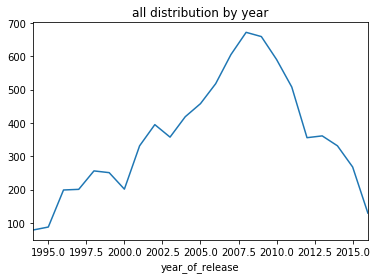

In [ ]:
data.groupby('year_of_release')['all_sales'].sum().plot(x="year_of_release")
plt.title('all distribution by year')

***Промежуточный вывод***

Построив графики для периода 13-17 годов видно что на всех платформах продажи уменьшаются. Более того после периода 2005-2010 года уменьшаются продажи вообще всех игр.

Можно предположить, что метрика "общее количество продаж для одной игры" нерелевантна и не подходит для данной задачи. Однажды выпущенная игра продаётся достаточно длительное время, поэтому игры выпущенные например в 2010 году в любом случае будут иметь большие продажи чем игры выпущенные в 2017 году из-за накопительного эффекта (одни игры покупали 7 лет а другие только 1 год).

К сожалению данных по продажам каждой игры в разделении по годам у нас нет. Поэтому наиболее перспективные платформы можно определить двумя способами. Либо взяв продажи только за один год (лучше всего взять 2016 год тк по условию известно что за 2017 данные не полные). Либо взяв не продажи игр а количество игр выпущенных на платформе (предполагаем что если выпускается много игр то платформа популярна).

In [ ]:
 data[data['year_of_release']==2016].groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: all_sales, dtype: float64

PS4


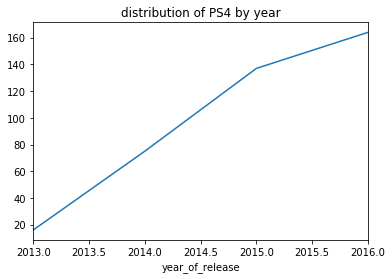

PS3


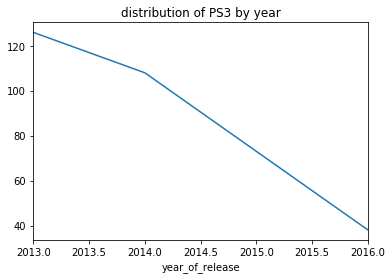

XOne


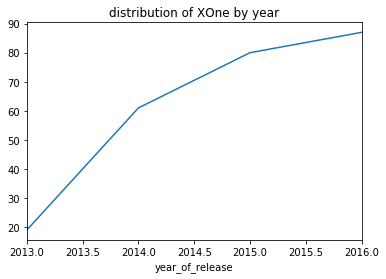

3DS


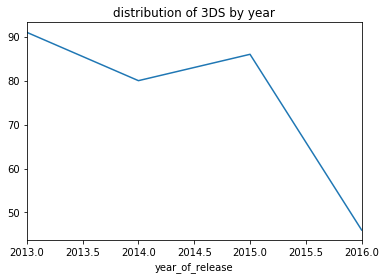

X360


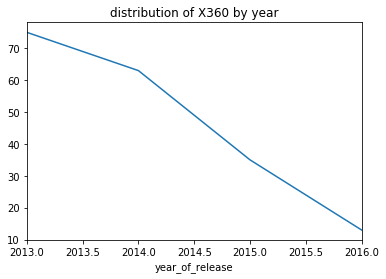

WiiU


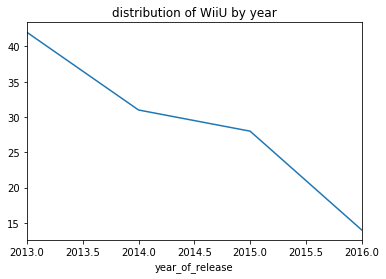

PC


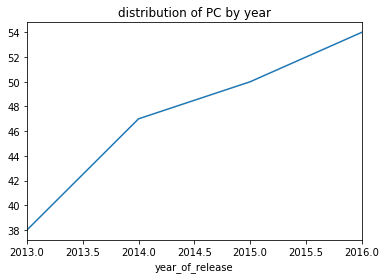

PSV


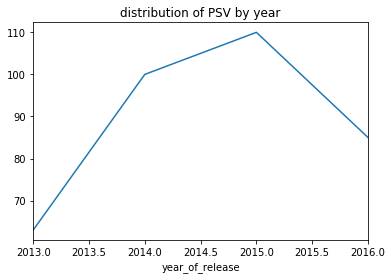

Wii


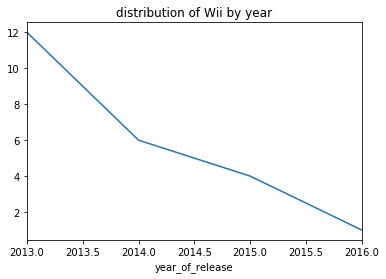

PSP


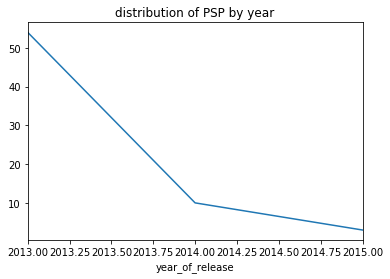

In [ ]:
for x in name_platform_new:
    data[(data['platform'] == x)&(data['year_of_release']>=2013)].groupby('year_of_release')['name'].count().plot(x="year_of_release")
    plt.title(f'distribution of {x} by year')
    print(x)
    plt.show()

In [ ]:
data_old = data.copy(deep=True)
data = data[data['year_of_release']>=2013]
# Отбрасываю все данные старше 2010 года.
# На всякий случай сохраняю полные данные под именем data_old.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float64
rating             1256 non-null object
all_sales          2233 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


В конечном итоге осталось 5277 значений, что вполне достаточно для анализа.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'all sales')

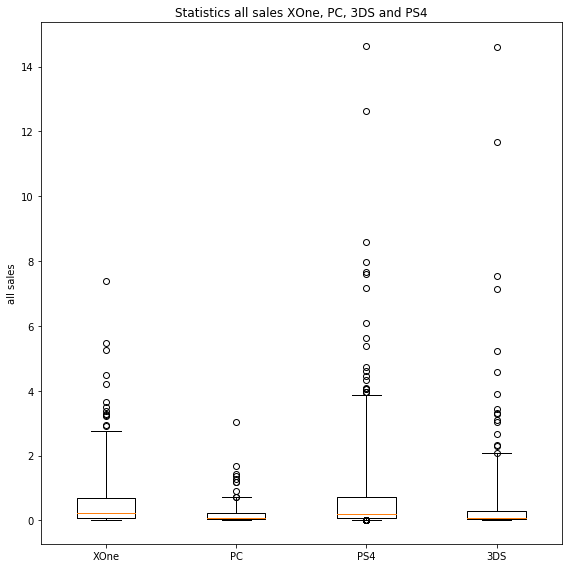

In [ ]:
fig, axs = plt.subplots(figsize=(8, 8), tight_layout=True)

plt.boxplot ([data[data['platform'] == 'XOne']['all_sales'],
              data[data['platform'] == 'PC']['all_sales'],
              data[data['platform'] == 'PS4']['all_sales'],
             data[data['platform'] == '3DS']['all_sales']],
             labels = ('XOne', 'PC', 'PS4', '3DS'), whis = (5, 95)
              )
plt.title('Statistics all sales XOne, PC, 3DS and PS4')
axs.set_ylabel('all sales')
# Построил ящики с усами для выбранных платформ.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Statistics all sales XOne, PC, 3DS and PS4')

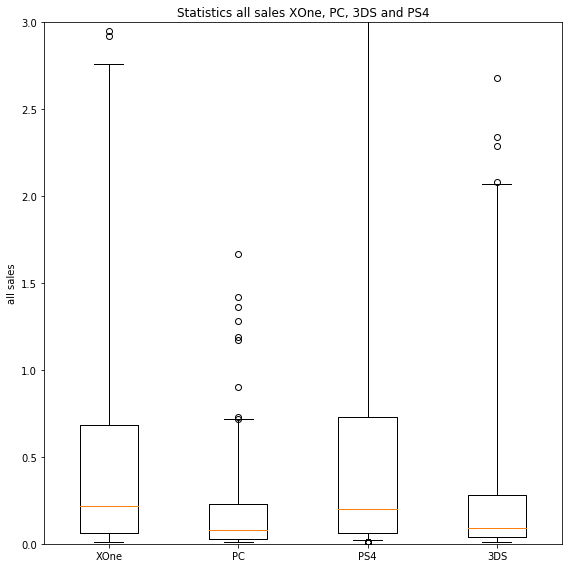

In [ ]:
fig, axs = plt.subplots(figsize=(8, 8), tight_layout=True)

plt.boxplot ([data[data['platform'] == 'XOne']['all_sales'],
              data[data['platform'] == 'PC']['all_sales'],
              data[data['platform'] == 'PS4']['all_sales'],
             data[data['platform'] == '3DS']['all_sales']],
             labels = ('XOne', 'PC', 'PS4', '3DS'), whis = (5, 95)
              )
plt.ylim([0, 3])
axs.set_ylabel('all sales')
plt.title('Statistics all sales XOne, PC, 3DS and PS4')

Глядя на диаграммы можно заметить большое количество выбросов. При этом медианные значения для всех платформ близки к нулю. Из этого можно сделать вывод что большая часть игр продаются довольно слабо и ситуацию спасают только некоторые игры которые продаются в десятки и сотни раз лучше среднего. 

Если обрезать выбросы (наиболее продаваемые игры) видно что медиана и 50% значений (25-75 процентили) у платформ XOne и PS4 заметно выше чем у 'PC' и '3DS.

Text(0.5, 1.0, 'dependence of the user score on sales XOne')

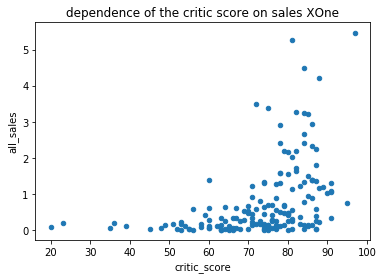

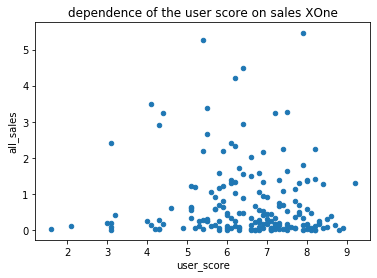

In [ ]:
data[data['platform'] == 'XOne'].plot(x='critic_score', y='all_sales', kind='scatter') 
plt.title('dependence of the critic score on sales XOne')
data[data['platform'] == 'XOne'].plot(x='user_score', y='all_sales', kind='scatter') 
plt.title('dependence of the user score on sales XOne')

In [ ]:
print('Корреляция продаж и оценок критиков:', data[data['platform'] == 'XOne']['critic_score'].corr(data[data['platform'] == 'XOne']['all_sales']))
print('Корреляция продаж и оценок пользователей:', data[data['platform'] == 'XOne']['user_score'].corr(data[data['platform'] == 'XOne']['all_sales']))

Корреляция продаж и оценок критиков: 0.4169983280084017
Корреляция продаж и оценок пользователей: -0.06892505328279414


Для платформы 'XOne' можно сделать вывод что корреляция между оценками критиков и продажами существует, хоть и не является сильно выраженной. Корреляция между оценками пользователей и продажами практический отсутствует.

Text(0.5, 1.0, 'dependence of the user score on sales PS4')

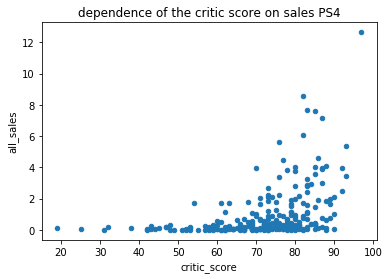

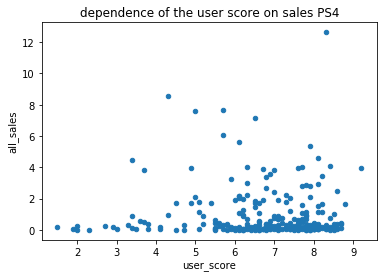

In [ ]:
data[data['platform'] == 'PS4'].plot(x='critic_score', y='all_sales', kind='scatter') 
plt.title('dependence of the critic score on sales PS4')
data[data['platform'] == 'PS4'].plot(x='user_score', y='all_sales', kind='scatter') 
plt.title('dependence of the user score on sales PS4')

In [ ]:
print('Корреляция продаж и оценок критиков:', data[data['platform'] == 'PS4']['critic_score'].corr(data[data['platform'] == 'PS4']['all_sales']))
print('Корреляция продаж и оценок пользователей:', data[data['platform'] == 'PS4']['user_score'].corr(data[data['platform'] == 'PS4']['all_sales']))

Корреляция продаж и оценок критиков: 0.40656790206178095
Корреляция продаж и оценок пользователей: -0.031957110204556424


Для платформы ***'PS4'*** картина такая же как и для ***'XOne'***, небольшая корреляция между оценками критиков и продажами и практический никакой корреляции между оценками пользователей и продажами.

Text(0.5, 1.0, 'dependence of the user score on sales PC')

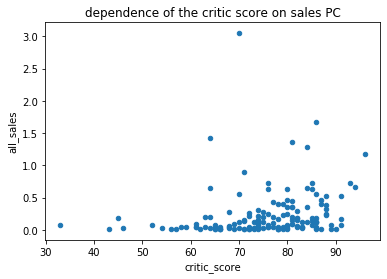

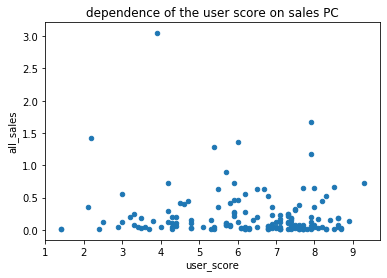

In [ ]:
data[data['platform'] == 'PC'].plot(x='critic_score', y='all_sales', kind='scatter') 
plt.title('dependence of the critic score on sales PC')
data[data['platform'] == 'PC'].plot(x='user_score', y='all_sales', kind='scatter') 
plt.title('dependence of the user score on sales PC')

In [ ]:
print('Корреляция продаж и оценок критиков:', data[data['platform'] == 'PC']['critic_score'].corr(data[data['platform'] == 'PC']['all_sales']))
print('Корреляция продаж и оценок пользователей:', data[data['platform'] == 'PC']['user_score'].corr(data[data['platform'] == 'PC']['all_sales']))

Корреляция продаж и оценок критиков: 0.19603028294369382
Корреляция продаж и оценок пользователей: -0.0938418695247674


Для платформы ***'PC'*** мы  вообще не видим корреляцию между продажами и оценками что пользователей что критиков.

Text(0.5, 1.0, 'dependence of the user score on sales 3DS')

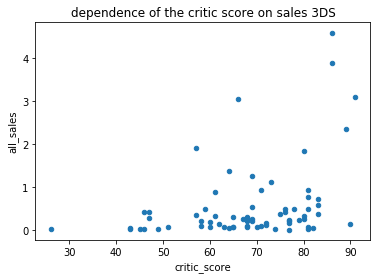

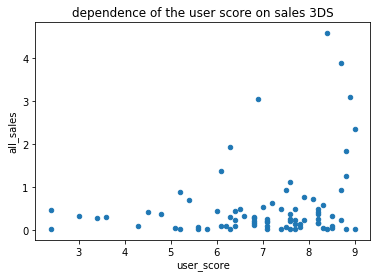

In [ ]:
data[data['platform'] == '3DS'].plot(x='critic_score', y='all_sales', kind='scatter') 
plt.title('dependence of the critic score on sales 3DS')
data[data['platform'] == '3DS'].plot(x='user_score', y='all_sales', kind='scatter') 
plt.title('dependence of the user score on sales 3DS')

In [ ]:
print('Корреляция продаж и оценок критиков:', data[data['platform'] == '3DS']['critic_score'].corr(data[data['platform'] == '3DS']['all_sales']))
print('Корреляция продаж и оценок пользователей:', data[data['platform'] == '3DS']['user_score'].corr(data[data['platform'] == '3DS']['all_sales']))

Корреляция продаж и оценок критиков: 0.3570566142288103
Корреляция продаж и оценок пользователей: 0.24150411773563016


Для платформы '3DS' можно сделать вывод что корреляция между оценками критиков и продажами существует, хоть и не является сильно выраженной. Корреляция между оценками пользователей и продажами на грани значимости.

In [ ]:
data.groupby('genre')['all_sales'].sum().sort_values(ascending=False)
# Вывел суммарную выручку игр по жанрам в порядке убывания

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: all_sales, dtype: float64

Text(0.5, 1.0, '8 best genre on sales')

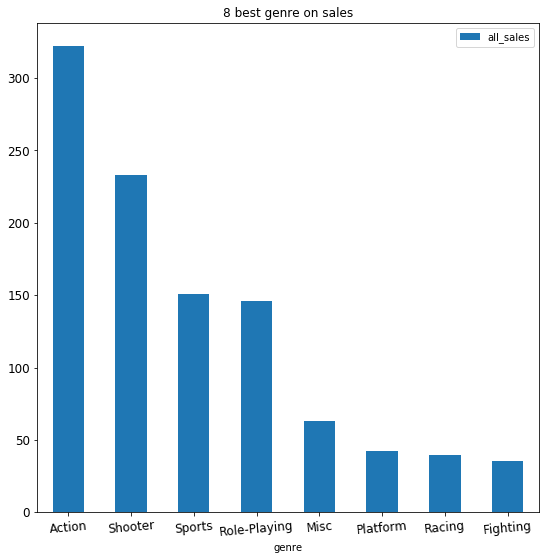

In [ ]:
data.groupby('genre')['all_sales'].sum().sort_values(ascending=False).reset_index().head(8).plot(x="genre", y="all_sales",
                                                                                                 kind="bar", rot=5, fontsize=12, figsize = (9, 9))
xlabel='genre'
plt.title('8 best genre on sales')    

In [ ]:
data.groupby('genre')['name'].count().sort_values(ascending=False)
# Вывел количество выпущенных игр по жанрам в порядке убывания

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

Text(0.5, 1.0, '8 best genre on quantity')

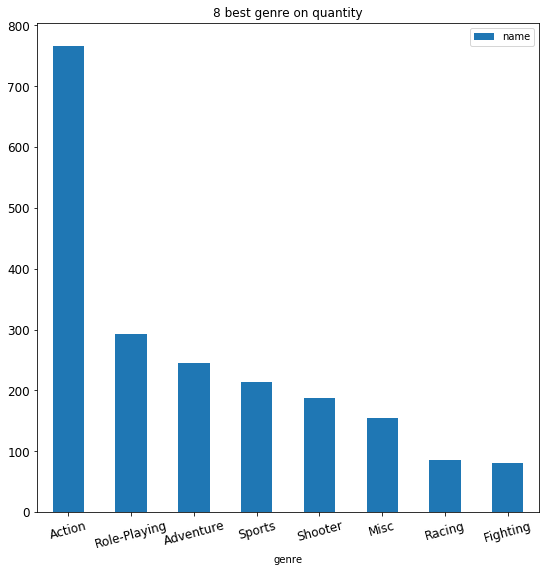

In [ ]:
data.groupby('genre')['name'].count().sort_values(ascending=False).reset_index().head(8).plot(x="genre", y="name",
                                                                                                 kind="bar", rot=15, fontsize=12, figsize = (9, 9))
xlabel='genre'
plt.title('8 best genre on quantity')    

In [ ]:
data.groupby('genre')['all_sales'].mean().sort_values(ascending=False)
# Вывел среднюю выручку по жанрам в порядке убывания

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: all_sales, dtype: float64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 5)

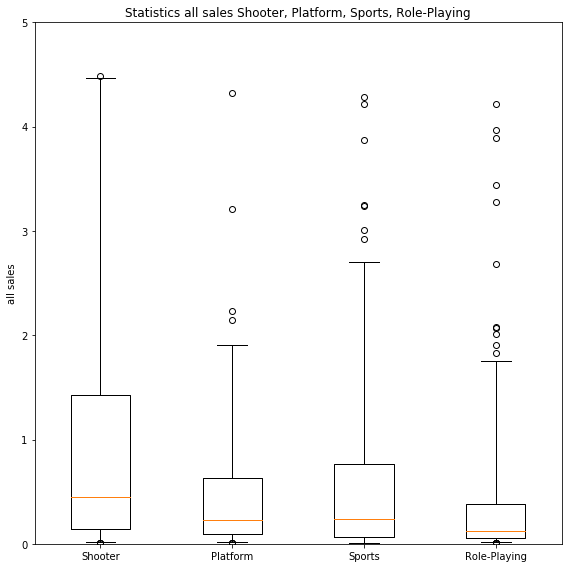

In [ ]:
fig, axs = plt.subplots(figsize=(8, 8), tight_layout=True)

plt.boxplot ([data[data['genre'] == 'Shooter']['all_sales'],
              data[data['genre'] == 'Platform']['all_sales'],
              data[data['genre'] == 'Sports']['all_sales'],
             data[data['genre'] == 'Role-Playing']['all_sales']],
             labels = ('Shooter', 'Platform', 'Sports', 'Role-Playing'), whis = (5, 95)
              )
plt.title('Statistics all sales Shooter, Platform, Sports, Role-Playing')
axs.set_ylabel('all sales')
plt.ylim([0, 5])
# Построил ящики с усами для выбранных жанров.

Если смотреть распределение по количеству продаж и количеству выпущенных игр то можно заметить что наиболее популярен Action. Самый непопулярный это  Puzzle. Можно заметить что жанры заметно различаются по популярности, жанры с максиальными и минимальными продажами отличаются более чем на порядок. 

Но если разделить продажи на общее количество игр в каждом жанре (найти среднее) то можно заметить что самую высокую выручку в расчёте на одну игру приносят Shooter и Sports. У них наиболее высокие и среднее и медиана и распределение и 50% значений (25-75 процентили).

### Вывод

Провёл исследование для определения времени жизни платформ и интересующего временного интервала, нашёл наиболее популярные платформы, и определил наиболее популярные жанры. Определил что отзывы критиков очень слабо связаны с продажами игр а отзывы пользователей практический совсем не связаны с продажами.

## 4 Определение портрета пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [ ]:
data.loc[data['rating'].isna(), ['rating']] = 'unknown'

In [ ]:
#fig = plt.figure(figsize=(14, 10))
#axs1 = fig.add_subplot(1, 3, 1)
#axs2 = fig.add_subplot(1, 3, 2)
#axs3 = fig.add_subplot(1, 3, 3)
#axs1.pie((*list(data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)),
#          data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[5::].sum()),
#        labels = (*data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
#        autopct='%1.1f%%')
#axs1.set(title='genre north america')
#axs2.pie((*list(data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)),
#          data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[5::].sum()),
#       labels = (*data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
#        autopct='%1.1f%%')
#axs2.set(title='genre europe')
#axs3.pie((*list(data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)),
#          data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[5::].sum()),
#        labels = (*data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
#        autopct='%1.1f%%')
#axs3.set(title='genre japan')


# Образец построения отдельных графиков если общий поломается.

[Text(0.5, 1.0, 'platform japan')]

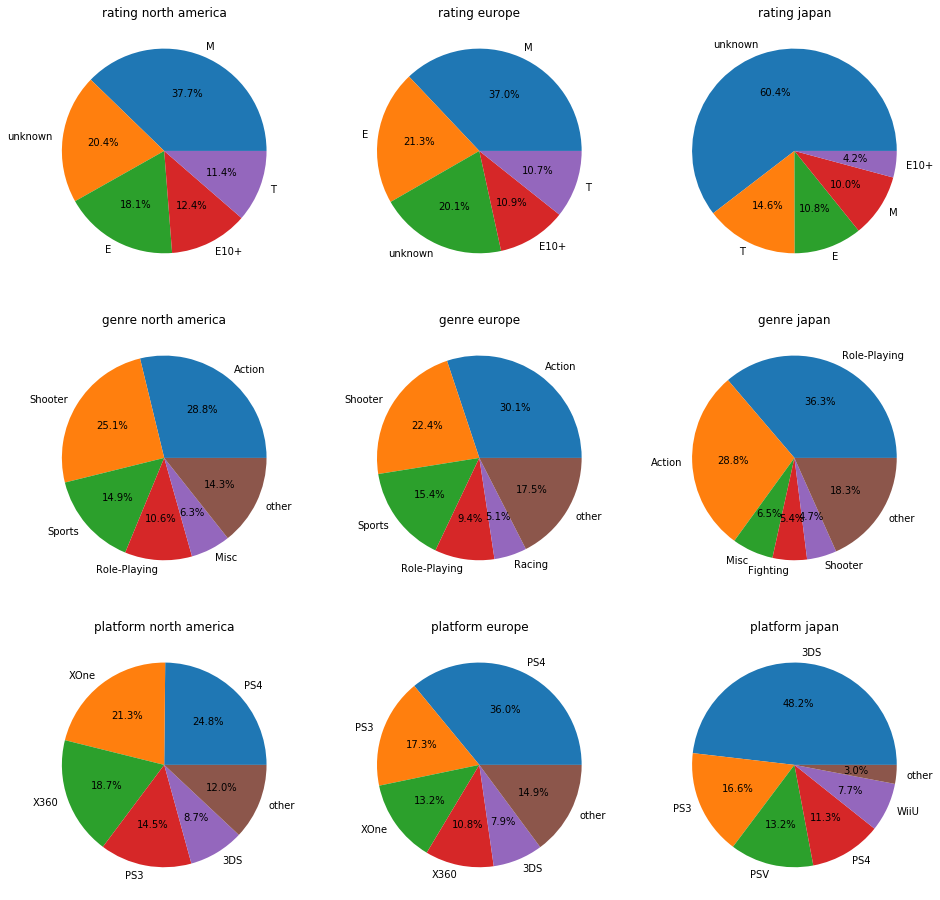

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols =3, figsize=(16, 16))

axes[0, 0].pie(data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5),
        labels = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5).index,
        autopct='%1.1f%%')
axes[0, 0].set(title='rating north america')

axes[0, 1].pie(data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5),
        labels = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5).index,
        autopct='%1.1f%%')
axes[0, 1].set(title='rating europe')

axes[0, 2].pie(data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5),
        labels = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5).index,
        autopct='%1.1f%%')
axes[0, 2].set(title='rating japan')

axes[1, 0].pie((*list(data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)),
          data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[5::].sum()),
        labels = (*data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
        autopct='%1.1f%%')
axes[1, 0].set(title='genre north america')

axes[1, 1].pie((*list(data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)),
          data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[5::].sum()),
        labels = (*data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
        autopct='%1.1f%%')
axes[1, 1].set(title='genre europe')

axes[1, 2].pie((*list(data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)),
          data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[5::].sum()),
        labels = (*data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
        autopct='%1.1f%%')
axes[1, 2].set(title='genre japan')

axes[2, 0].pie((*list(data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)),
          data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[5::].sum()),
        labels = (*data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
        autopct='%1.1f%%')
axes[2, 0].set(title='platform north america')

axes[2, 1].pie((*list(data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)),
          data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[5::].sum()),
        labels = (*data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
        autopct='%1.1f%%')
axes[2, 1].set(title='platform europe')

axes[2, 2].pie((*list(data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)),
          data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[5::].sum()),
        labels = (*data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).index, 'other'),
        autopct='%1.1f%%')
axes[2, 2].set(title='platform japan')

In [ ]:
print('Продажи по жанрам в Америке:', data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5), '',
      'Продажи по платформам в Америке:', data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5), '',
      'Продажи по возрастному рейтингу в Америке:',
      data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5), sep = '\n')

Продажи по жанрам в Америке:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Продажи по платформам в Америке:
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Продажи по возрастному рейтингу в Америке:
rating
M          165.21
unknown     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64


In [ ]:
print('Продажи по жанрам в Европе:', data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5), '',
      'Продажи по платформам в Европе:', data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5), '',
      'Продажи по возрастному рейтингу в Европе:',
      data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5), sep = '\n')

Продажи по жанрам в Европе:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Продажи по платформам в Европе:
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

Продажи по возрастному рейтингу в Европе:
rating
M          145.32
E           83.36
unknown     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64


In [ ]:
print('Продажи по жанрам в Японии:', data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5), '',
      'Продажи по платформам в Японии:', data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5), '',
      'Продажи по возрастному рейтингу в Японии:',
      data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5), sep = '\n')

Продажи по жанрам в Японии:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

Продажи по платформам в Японии:
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

Продажи по возрастному рейтингу в Японии:
rating
unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64


### Вывод

В распределении по жанрам в Северной Америке и Европе наиболее популярны Action и Shooter. В Японии их обогнали  Role-Playing.

В распределении по платформам в Северной Америке XOne и PS4. В Европе наиболее популярны PS4 и PS3. В Японии 3DS и PS3.

В распределении по рейтингу в Северной Америке, Европе лидирует "М" а в Японии лидирует "Т". Но стоит обратить внимание что в Японии очень много продаж у игр с неуказанным рейтингом (их доля больше половины от всех игр). Эта ситуация требует отдельного рассмотрения, возможно там существует свой рейтинг, не зависящий от ESRB либо игры для японского рынка не передают в ESRB для оценки. 

## 5 Проверка гипотез

Проверить гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Нулевая гипотеза - "средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Альтернативная "пользовательские рейтинги платформ Xbox One и PC различаются". Уровень значимости возьму 5%, что является одним из наиболее распространённых вариантов.

In [ ]:
user_score_xb_one = data[data['platform'] =='XOne']['user_score'].to_numpy()
user_score_pc = data[data['platform'] =='PC']['user_score'].to_numpy()

results_score = st.ttest_ind(user_score_xb_one, user_score_pc, equal_var = False, nan_policy = 'omit')
alpha = 0.05
if results_score.pvalue < alpha:
    print("средний рейтинг для Xbox One:", int(np.nanmean(user_score_xb_one)),
          "средний рейтинг для PC:", int(np.nanmean(user_score_pc)))
    print("Они статистический различаются, p-value равно:", results_score.pvalue)
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC статистический не различаются")
    print("p-value равно:", results_score.pvalue)

Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC статистический не различаются
p-value равно: 0.1475959401343003


Нулевая гипотеза - "средние пользовательские рейтинги жанров Action и Sports одинаковые". Альтернативная "пользовательские рейтинги жанров Action и Sports различаются". Уровень значимости возьму 5%, что является одним из наиболее распространённых вариантов.

In [ ]:
user_score_action = data[data['genre'] =='Action']['user_score'].to_numpy()
user_score_sports = data[data['genre'] =='Sports']['user_score'].to_numpy()

results_score = st.ttest_ind(user_score_action, user_score_sports, equal_var = False, nan_policy = 'omit')
alpha = 0.05
if results_score.pvalue < alpha:
    print("средний рейтинг для жанрa Action:", int(np.nanmean(user_score_action)),
          "средний рейтинг для жанрa Sports:", int(np.nanmean(user_score_sports)))
    print("Они статистический различаются, p-value равно:", results_score.pvalue)
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports статистический не различаются")


средний рейтинг для жанрa Action: 6 средний рейтинг для жанрa Sports: 5
Они статистический различаются, p-value равно: 1.446003970070351e-20


### Вывод

При выборе нулевой гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" метод st.ttest_ind показал большое p-value (выше выбранного уровня стат значимости). Следовательно, нулевую гипотезу отвергнуть не получилось, это значит что с большой долей вероятности различие может быть вызвано слчайностью. Средние пользовательские рейтинги платформ Xbox One и PC статистический не различаются

При выборе нулевой гипотезы "средние пользовательские рейтинги жанров Action и Sports одинаковые" метод st.ttest_ind показал очень маленькое p-value (ниже выбранного уровня стат значимости). Следовательно, нулевую гипотезу можно отвергнуть, это значит вероятность того что различие было вызвано слчайностью очень мала. Можно с уверенностью утверждать что средние пользовательские рейтинги жанров Action и Sports различны.


## 6 Общий вывод проекта


Мною был получен датасет по продажам игр и проведена предобработка и очистка данных. Для оценки наиболее порспективных платформ я определил срок жизни одной платформы, он примерно равен десяти годам. Дальнейшее рассмотрение я вёл только для периода с 2013 по 2017 годы. Определил наиболее перспективные платформы, это были  PC, PS4, 3DS и XOne. При исследовании зависимости продаж от рейтингов критиков оказалось что корреляции довольно слабые (а от рейтинга пользователей зависимости вообще нет). При этом большая часть игр имеет достаточно скромные продажи, но некоторые игры продаются в десятки раз больше среднего (много выбросов). Исследуя продажи так же можно заметить что больше всего игр выпускается в жанре Action а самую высокую выручку в расчёте на одну игру приносят Shooter и Sports.

Поведение пользователей в разных регионах различается при этом пользователи Европы и Америки довольно похожи а пользователи Японии имеют ряд особенностей. В Европе и Северной Америке наибольшей популярностью пользуются жанры Action и Shooter (в Японии лидирует Role-Playing). В распределении по платформам в Северной Америке XOne и PS4. В Европе наиболее популярны PS4 и PS3. В Японии 3DS и PS3.
В распределении по рейтингу в Северной Америке, Европе лидирует "М" а в Японии лидирует "Т", при этом большую часть продаж в Японии составляют игры с неуказанным рейтингом.


При статистическом исследовании гипотез я определил что средние пользовательские рейтинги платформ Xbox One и PC одинаковые а средние пользовательские рейтинги жанров Action и Sports различаются (при этом у Action рейтинг выше).